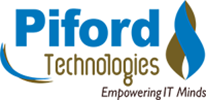

# Custom Object Detector Using Faster R-CNN

#### using OID https://github.com/EscVM/OIDv4_ToolKit
#### command to execute :  
                           python main.py downloader --classes classes.txt --type_csv validation --Dataset Dataset

                           python main.py downloader --classes classes.txt --type_csv train --Dataset Dataset
                           
                           python main.py downloader --classes classes.txt --type_csv test --Dataset Dataset




In [1]:
import os, sys, random
import xml.etree.ElementTree as ET
import mxnet as mx
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas as pd
import random
from skimage import io
from shutil import copyfile
import sys
import time

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array



c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\lenovo\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\lenovo\

'dataset_dir = \'D:/5-deep_learning_with_tensorflow/module 7 cnn/7-faster_r-cnn/SAR_faster-rcnn/dataset\'\nimg_dir = os.path.join(dataset_dir, "JPEGImages")\nlabel_dir = os.path.join(dataset_dir, "Annotations")\nimg_names = os.listdir(img_dir)\nimg_names.sort()\nlabel_names = os.listdir(label_dir)\nlabel_names.sort()'

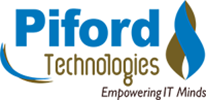

In [2]:
# training annotation file
training_annotation_loc = 'D:/5-deep_learning_with_tensorflow/module 7 cnn/7-faster_r-cnn/SAR_faster-rcnn/OIDv4_ToolKit/OID/csv_folder/train-annotations-bbox.csv'
training_annotation_file = pd.read_csv(training_annotation_loc)
print("records present for training : ",training_annotation_file.shape)
training_annotation_file.head()



records present for training :  (1048575, 13)


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [3]:
# The class-descriptions-boxable.csv contains the name of all 600 classes with their corresponding ‘LabelName’
class_descriptions_file='D:/5-deep_learning_with_tensorflow/module 7 cnn/7-faster_r-cnn/SAR_faster-rcnn/OIDv4_ToolKit/OID/csv_folder/class-descriptions-boxable.csv'
class_descriptions = pd.read_csv(class_descriptions_file, header=None)
print(class_descriptions.shape)
class_descriptions.head()


(601, 2)


,0,1
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [4]:
# Find the label_name for 'Apple', 'Orange' and 'Light Switches' classes
apple_pd = class_descriptions[class_descriptions[1]=='Apple']
orange_pd = class_descriptions[class_descriptions[1]=='Orange']
light_pd = class_descriptions[class_descriptions[1]=='Light switch']
apple_pd


label_name_apple = apple_pd[0].values[0]
label_name_orange = orange_pd[0].values[0]
label_name_light = light_pd[0].values[0]

In [5]:
orange_pd

,0,1
480,/m/0cyhj_,Orange


In [6]:
light_pd

,0,1
239,/m/03jbxj,Light switch


In [7]:
apple_bbox = training_annotation_file[training_annotation_file['LabelName']==label_name_apple]
orange_bbox = training_annotation_file[training_annotation_file['LabelName']==label_name_orange]
light_bbox = training_annotation_file[training_annotation_file['LabelName']==label_name_light]
apple_bbox

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
17305,000d9c59687b509b,xclick,/m/014j1m,1,0.000000,0.378125,0.000000,0.379167,1,1,1,0,0
17306,000d9c59687b509b,xclick,/m/014j1m,1,0.280000,0.872500,0.379167,0.865000,1,0,1,0,0
17307,000d9c59687b509b,xclick,/m/014j1m,1,0.346875,0.385625,0.483333,0.535833,1,0,0,0,0
27662,0018c49a9ed3c640,xclick,/m/014j1m,1,0.144375,0.520000,0.000000,0.229539,1,1,1,0,0
27663,0018c49a9ed3c640,xclick,/m/014j1m,1,0.173750,0.831250,0.400753,0.929445,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027737,0eeeec32799af3da,xclick,/m/014j1m,1,0.000000,0.705625,0.205833,0.999167,0,1,0,0,0
1027738,0eeeec32799af3da,xclick,/m/014j1m,1,0.648750,0.999375,0.132500,0.980000,1,1,0,0,0
1028735,0ef341dfb802eff1,activemil,/m/014j1m,1,0.301875,0.394375,0.694167,0.787500,-1,-1,-1,-1,-1
1028736,0ef341dfb802eff1,xclick,/m/014j1m,1,0.000000,0.999375,0.209167,0.810000,1,1,1,0,0


In [8]:
print('There are %d apples in the dataset' %(len(apple_bbox)))
print('There are %d oranges in the dataset' %(len(orange_bbox)))
print('There are %d lights in the dataset' %(len(light_bbox)))


There are 627 apples in the dataset
There are 920 oranges in the dataset
There are 20 lights in the dataset


In [9]:
apple_img_id = apple_bbox['ImageID']
orange_img_id = orange_bbox['ImageID']
light_img_id = light_bbox['ImageID']
apple_img_id.count() # 627 different ids are present
apple_img_id  # these are the details of 627 different ids present in apple_img_id


17305      000d9c59687b509b
17306      000d9c59687b509b
17307      000d9c59687b509b
27662      0018c49a9ed3c640
27663      0018c49a9ed3c640
                 ...       
1027737    0eeeec32799af3da
1027738    0eeeec32799af3da
1028735    0ef341dfb802eff1
1028736    0ef341dfb802eff1
1028737    0ef341dfb802eff1
Name: ImageID, Length: 627, dtype: object

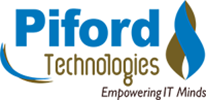

In [10]:
concated_df=pd.concat([apple_bbox, orange_bbox, light_bbox], axis=0)
concated_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
17305,000d9c59687b509b,xclick,/m/014j1m,1,0.000000,0.378125,0.000000,0.379167,1,1,1,0,0
17306,000d9c59687b509b,xclick,/m/014j1m,1,0.280000,0.872500,0.379167,0.865000,1,0,1,0,0
17307,000d9c59687b509b,xclick,/m/014j1m,1,0.346875,0.385625,0.483333,0.535833,1,0,0,0,0
27662,0018c49a9ed3c640,xclick,/m/014j1m,1,0.144375,0.520000,0.000000,0.229539,1,1,1,0,0
27663,0018c49a9ed3c640,xclick,/m/014j1m,1,0.173750,0.831250,0.400753,0.929445,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
813005,0b6612de14c7f1a7,xclick,/m/03jbxj,1,0.718099,0.940755,0.561198,0.711589,0,0,0,0,0
880534,0c849a25ca3b6314,xclick,/m/03jbxj,1,0.140625,0.876250,0.174167,0.756667,1,0,0,0,0
930387,0d54617f41cfd271,xclick,/m/03jbxj,1,0.169375,0.767500,0.021667,0.936667,0,0,0,0,0
989527,0e4e3d5f2abb7fe4,xclick,/m/03jbxj,1,0.477500,0.693750,0.181111,0.824444,0,0,0,0,0


In [11]:
concated_df['ClassName']=concated_df['LabelName']
concated_df['ClassName']

17305     /m/014j1m
17306     /m/014j1m
17307     /m/014j1m
27662     /m/014j1m
27663     /m/014j1m
            ...    
813005    /m/03jbxj
880534    /m/03jbxj
930387    /m/03jbxj
989527    /m/03jbxj
989528    /m/03jbxj
Name: ClassName, Length: 1567, dtype: object

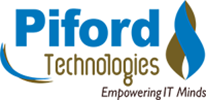

In [12]:
#classes = ['apple', 'orange', 'Light switch']
#labels = ['/m/014j1m', '/m/0cyhj_', '/m/03jbxj']


mapping = {
    '/m/014j1m': 'Apple',
    '/m/0cyhj_': 'Orange',
    '/m/03jbxj': 'Light Switch',
}

concated_df['ClassName'] = [mapping[word] for word in concated_df['ClassName']]
concated_df['ClassName']

concated_df

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName
17305,000d9c59687b509b,xclick,/m/014j1m,1,0.000000,0.378125,0.000000,0.379167,1,1,1,0,0,Apple
17306,000d9c59687b509b,xclick,/m/014j1m,1,0.280000,0.872500,0.379167,0.865000,1,0,1,0,0,Apple
17307,000d9c59687b509b,xclick,/m/014j1m,1,0.346875,0.385625,0.483333,0.535833,1,0,0,0,0,Apple
27662,0018c49a9ed3c640,xclick,/m/014j1m,1,0.144375,0.520000,0.000000,0.229539,1,1,1,0,0,Apple
27663,0018c49a9ed3c640,xclick,/m/014j1m,1,0.173750,0.831250,0.400753,0.929445,1,0,1,0,0,Apple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813005,0b6612de14c7f1a7,xclick,/m/03jbxj,1,0.718099,0.940755,0.561198,0.711589,0,0,0,0,0,Light Switch
880534,0c849a25ca3b6314,xclick,/m/03jbxj,1,0.140625,0.876250,0.174167,0.756667,1,0,0,0,0,Light Switch
930387,0d54617f41cfd271,xclick,/m/03jbxj,1,0.169375,0.767500,0.021667,0.936667,0,0,0,0,0,Light Switch
989527,0e4e3d5f2abb7fe4,xclick,/m/03jbxj,1,0.477500,0.693750,0.181111,0.824444,0,0,0,0,0,Light Switch


In [13]:
# Data format for faster R-Cnn   :    ['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])
train_df= concated_df.loc[:,['ImageID','XMin','XMax','YMin','YMax','ClassName']]
train_df

,ImageID,XMin,XMax,YMin,YMax,ClassName
17305,000d9c59687b509b,0.000000,0.378125,0.000000,0.379167,Apple
17306,000d9c59687b509b,0.280000,0.872500,0.379167,0.865000,Apple
17307,000d9c59687b509b,0.346875,0.385625,0.483333,0.535833,Apple
27662,0018c49a9ed3c640,0.144375,0.520000,0.000000,0.229539,Apple
27663,0018c49a9ed3c640,0.173750,0.831250,0.400753,0.929445,Apple
...,...,...,...,...,...,...
813005,0b6612de14c7f1a7,0.718099,0.940755,0.561198,0.711589,Light Switch
880534,0c849a25ca3b6314,0.140625,0.876250,0.174167,0.756667,Light Switch
930387,0d54617f41cfd271,0.169375,0.767500,0.021667,0.936667,Light Switch
989527,0e4e3d5f2abb7fe4,0.477500,0.693750,0.181111,0.824444,Light Switch


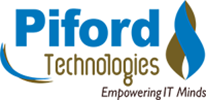

In [14]:
train_df['ImageID']=train_df['ImageID']+'.jpg'
train_df

,ImageID,XMin,XMax,YMin,YMax,ClassName
17305,000d9c59687b509b.jpg,0.000000,0.378125,0.000000,0.379167,Apple
17306,000d9c59687b509b.jpg,0.280000,0.872500,0.379167,0.865000,Apple
17307,000d9c59687b509b.jpg,0.346875,0.385625,0.483333,0.535833,Apple
27662,0018c49a9ed3c640.jpg,0.144375,0.520000,0.000000,0.229539,Apple
27663,0018c49a9ed3c640.jpg,0.173750,0.831250,0.400753,0.929445,Apple
...,...,...,...,...,...,...
813005,0b6612de14c7f1a7.jpg,0.718099,0.940755,0.561198,0.711589,Light Switch
880534,0c849a25ca3b6314.jpg,0.140625,0.876250,0.174167,0.756667,Light Switch
930387,0d54617f41cfd271.jpg,0.169375,0.767500,0.021667,0.936667,Light Switch
989527,0e4e3d5f2abb7fe4.jpg,0.477500,0.693750,0.181111,0.824444,Light Switch


In [15]:
train_df.shape
train_df.to_csv('train.csv')

In [16]:
train_df['ClassName'].value_counts()

Orange          920
Apple           627
Light Switch     20
Name: ClassName, dtype: int64

In [17]:
# Writing train.csv to annotation.txt

train_df = pd.read_csv('train.csv')

# for training
with open("annotation.txt", "w+") as f:
  for idx, row in train_df.iterrows():
      img = cv2.imread('train/' + row['ImageID'])
      #print(img)  #none 
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      train_file_path = 'D:/5-deep_learning_with_tensorflow/module 7 cnn/7-faster_r-cnn/SAR_faster-rcnn/train'
      fileName = os.path.join(train_file_path, row['ImageID'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')

In [18]:
# In the same way write annotation for test.csv
"""
test_df = pd.read_csv('test.csv')

# for test
with open("test_annotation.txt", "w+") as f:
  for idx, row in test_df.iterrows():
      sys.stdout.write(str(idx) + '\r')
      sys.stdout.flush()
      img = cv2.imread('test/' + row['ImgID'])
      height, width = img.shape[:2]
      x1 = int(row['XMin'] * width)
      x2 = int(row['XMax'] * width)
      y1 = int(row['YMin'] * height)
      y2 = int(row['YMax'] * height)
      
      test_file_path = 'D:/5-deep_learning_with_tensorflow/module 7 cnn/7-faster_r-cnn/Faster_r-cnn_demo_youtube/test'
      fileName = os.path.join(test_file_path, row['FileName'])
      className = row['ClassName']
      f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
      """

'\ntest_df = pd.read_csv(\'test.csv\')\n\n# for test\nwith open("test_annotation.txt", "w+") as f:\n  for idx, row in test_df.iterrows():\n      sys.stdout.write(str(idx) + \'\r\')\n      sys.stdout.flush()\n      img = cv2.imread(\'test/\' + row[\'ImgID\']+\'.jpg\')\n      height, width = img.shape[:2]\n      x1 = int(row[\'XMin\'] * width)\n      x2 = int(row[\'XMax\'] * width)\n      y1 = int(row[\'YMin\'] * height)\n      y2 = int(row[\'YMax\'] * height)\n      \n      test_file_path = \'D:/5-deep_learning_with_tensorflow/module 7 cnn/7-faster_r-cnn/Faster_r-cnn_demo_youtube/test\'\n      fileName = os.path.join(test_file_path, row[\'FileName\'])\n      className = row[\'ClassName\']\n      f.write(fileName + \',\' + str(x1) + \',\' + str(y1) + \',\' + str(x2) + \',\' + str(y2) + \',\' + className + \'\n\')\n      '

# Data is prepared now